###4-1. 인구현황 데이터 분석 (필수)

연습문제/인구현황분석.ipynb  코드를 완성하세요.

1. 지역별 총인구수 Top5


C:\Users\user\AppData\Local\Temp\ipykernel_12572\1004173723.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_population_sorted, x='행정기관', y='총인구수',palette=my_palette)


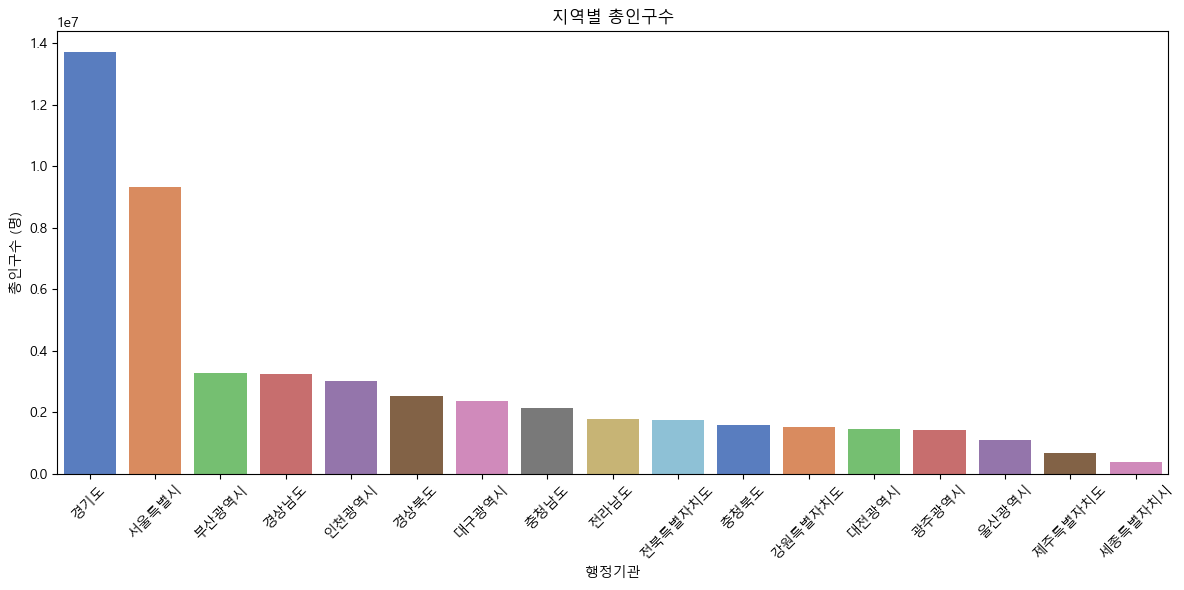

    행정기관      총인구수
0    경기도  11744210
1  서울특별시   9394807
2  부산광역시   3323591
3   경상남도   3144487
4  인천광역시   2766575


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# --- 한글 폰트 설정 (Windows 사용자 기준) ---
# 폰트 경로를 시스템에 맞게 지정해야 합니다.
try:
    font_path = 'C:/Windows/Fonts/malgun.ttf'
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc('font', family=font_prop.get_name())
except FileNotFoundError:
    print("맑은 고딕 폰트를 찾을 수 없습니다. 기본 폰트로 설정됩니다. (한글이 깨질 수 있습니다)")
# ---------------------------------------------

# '인구현황.csv' 파일을 utf-8 인코딩으로 불러옵니다.
df = pd.read_csv('../data/인구현황.csv', encoding='utf-8')

# '전국' 행 제외
df = df[df['행정기관'] != '전국']

# --- 데이터 준비 ---
# 총인구수를 기준으로 내림차순 정렬합니다.
df_population_sorted = df.sort_values(by='총인구수', ascending=False)


# --- Plot 생성 ---
plt.figure(figsize=(12, 6)) # 그래프 크기 설정
sns.barplot(data=df_population_sorted, x='행정기관', y='총인구수',palette=my_palette)

plt.title('지역별 총인구수') # 그래프 제목
plt.ylabel('총인구수 (명)')
plt.xticks(rotation=45) # x축 레이블 45도 회전

plt.tight_layout() # 레이아웃 최적화
plt.show()
population_by_region = data.groupby('광역시도')['인구수'].sum().reset_index()

# 3. 합산된 인구수를 기준으로 내림차순 정렬하고 상위 5개를 선택하는 효율적인 코드입니다.
top5_df = population_by_region.sort_values(by='인구수', ascending=False).head(5)

# 4. 문제의 출력 형식에 맞게 컬럼명을 '행정기관', '총인구수'로 변경합니다.
top5_df.columns = ['행정기관', '총인구수']

# 5. 인덱스를 0부터 다시 시작하도록 초기화합니다.
top5_df.reset_index(drop=True, inplace=True)

# 6. 최종 결과를 출력합니다.
print(top5_df)

2. 세대당 인구수 높은 지역 Top5


C:\Users\user\AppData\Local\Temp\ipykernel_12572\2962116862.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_household_sorted, x='행정기관', y='세대당 인구',palette=my_palette)


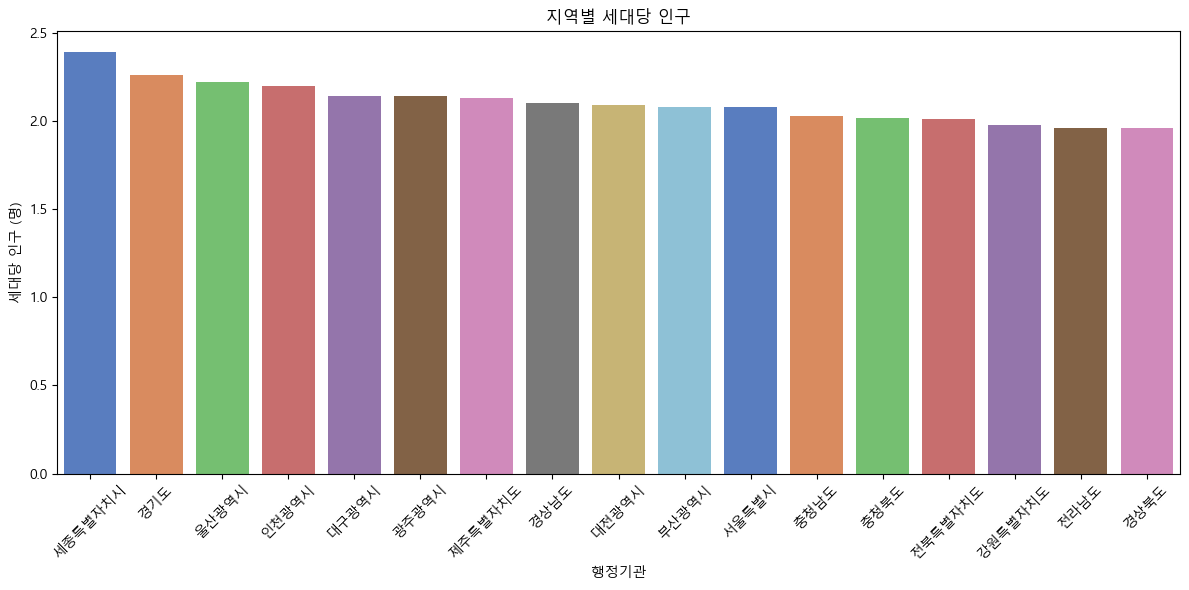

      행정기관  세대당 인구
0  세종특별자치시    2.39
1      경기도    2.26
2    울산광역시    2.22
3    인천광역시    2.20
4    대구광역시    2.14


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# --- 한글 폰트 설정 (Windows 사용자 기준) ---
try:
    font_path = 'C:/Windows/Fonts/malgun.ttf'
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc('font', family=font_prop.get_name())
except FileNotFoundError:
    print("맑은 고딕 폰트를 찾을 수 없습니다. 기본 폰트로 설정됩니다. (한글이 깨질 수 있습니다)")
# ---------------------------------------------

# '인구현황.csv' 파일을 utf-8 인코딩으로 불러옵니다.
df = pd.read_csv('../data/인구현황.csv', encoding='utf-8')

# '전국' 행 제외
df = df[df['행정기관'] != '전국']

df['세대당 인구 (계산)'] = round(df['총인구수'] / df['세대수'], 2)

# 계산된 '세대당 인구'를 기준으로 내림차순 정렬 후 상위 5개를 선택합니다.
top5_household = df[['행정기관', '세대당 인구 (계산)']].sort_values(by='세대당 인구 (계산)', ascending=False).head(5)

# 컬럼명을 문제의 출력과 동일하게 변경합니다.
top5_household.columns = ['행정기관', '세대당 인구']

# 인덱스를 초기화합니다.
top5_household.reset_index(drop=True, inplace=True)

# --- Plot 생성 ---

plt.figure(figsize=(12, 6)) # 그래프 크기 설정
my_palette = sns.color_palette("muted", n_colors=len(df_population_sorted))
sns.barplot(data=df_household_sorted, x='행정기관', y='세대당 인구',palette=my_palette)

plt.title('지역별 세대당 인구') # 그래프 제목
plt.ylabel('세대당 인구 (명)')
plt.xticks(rotation=45) # x축 레이블 45도 회전

plt.tight_layout() # 레이아웃 최적화
plt.show()
print(top5_household)

3. 남녀 비율 분석


In [36]:
import pandas as pd

# '인구현황.csv' 파일을 utf-8 인코딩으로 불러옵니다.
df = pd.read_csv('../data/인구현황.csv', encoding='utf-8')

# '전국' 행 제외
df = df[df['행정기관'] != '전국']

# 1. '남여 비율'을 직접 계산하여 새로운 컬럼으로 추가합니다.
#    남자 인구수를 여자 인구수로 나누고 소수점 2자리까지 반올림합니다.
df['남여 비율 (계산)'] = round(df['남자 인구수'] / df['여자 인구수'], 2)

# 2. 계산된 '남여 비율'을 기준으로 내림차순 정렬합니다.
df_sorted = df.sort_values(by='남여 비율 (계산)', ascending=False)

# 3. 필요한 컬럼('행정기관', '남여 비율 (계산)')만 선택합니다.
result_df = df_sorted[['행정기관', '남여 비율 (계산)']]

# 4. 문제의 출력 형식에 맞게 컬럼명을 변경합니다.
result_df.columns = ['행정기관', '남여 비율']

# 5. 인덱스를 0부터 다시 시작하도록 초기화합니다.
result_df.reset_index(drop=True, inplace=True)

# 6. 최종 결과를 출력합니다.
print(result_df)

       행정기관  남여 비율
0     울산광역시   1.06
1      충청남도   1.05
2      충청북도   1.04
3      경상남도   1.02
4      경상북도   1.02
5      전라남도   1.02
6       경기도   1.01
7   강원특별자치도   1.01
8   제주특별자치도   1.00
9     인천광역시   1.00
10  세종특별자치시   0.99
11    대전광역시   0.99
12  전북특별자치도   0.99
13    광주광역시   0.97
14    대구광역시   0.96
15    부산광역시   0.95
16    서울특별시   0.93


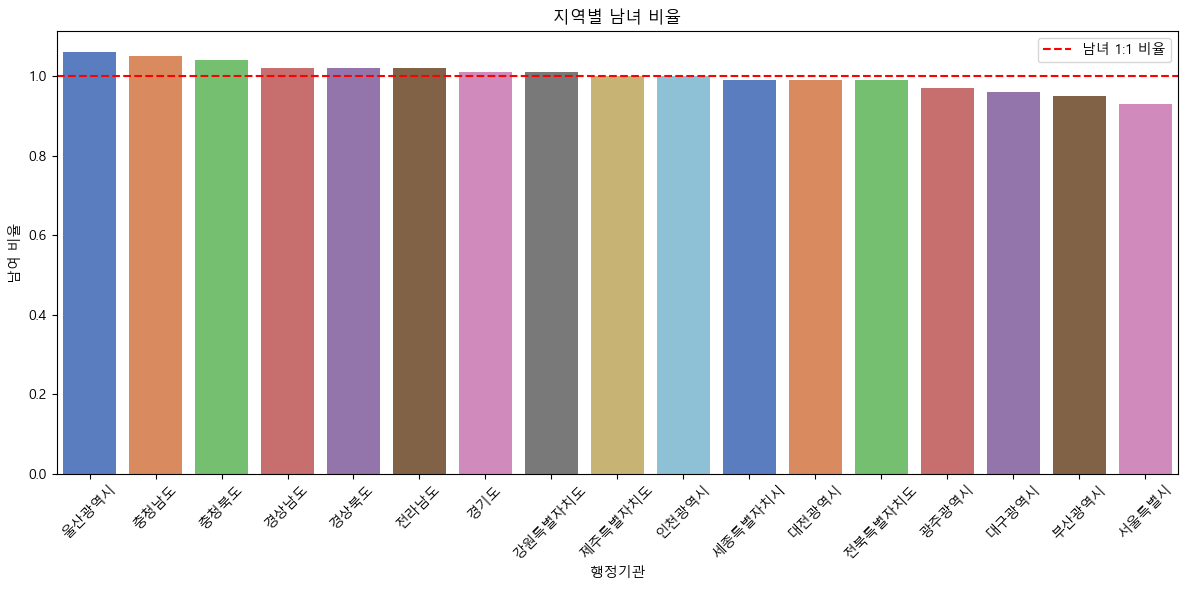

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# --- 한글 폰트 설정 (Windows 사용자 기준) ---
# 폰트 경로를 시스템에 맞게 지정해야 합니다.
try:
    font_path = 'C:/Windows/Fonts/malgun.ttf'
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc('font', family=font_prop.get_name())
except FileNotFoundError:
    print("맑은 고딕 폰트를 찾을 수 없습니다. 기본 폰트로 설정됩니다. (한글이 깨질 수 있습니다)")
# ---------------------------------------------

# '인구현황.csv' 파일을 utf-8 인코딩으로 불러옵니다.
df = pd.read_csv('../data/인구현황.csv', encoding='utf-8')

# '전국' 행 제외
df = df[df['행정기관'] != '전국']

# --- 데이터 준비 ---
# 남여 비율을 계산하고, 비율이 높은 순으로 정렬합니다.
df['남여 비율'] = round(df['남자 인구수'] / df['여자 인구수'], 2)
df_sorted = df.sort_values(by='남여 비율', ascending=False)


# --- Plot 생성 ---
plt.figure(figsize=(12, 6)) # 그래프 크기 설정

# Seaborn으로 막대그래프를 그립니다.
sns.barplot(data=df_sorted, x='행정기관', y='남여 비율', hue='행정기관', palette='muted', legend=False)

# 남녀 비율이 1.0인 지점에 빨간색 점선을 추가합니다.
plt.axhline(1.0, color='red', linestyle='--', label='남녀 1:1 비율')

# 위에서 추가한 점선의 라벨(label)을 범례(legend)로 표시합니다.
plt.legend()

plt.title('지역별 남녀 비율') # 그래프 제목
plt.xticks(rotation=45) # x축 레이블 45도 회전

plt.tight_layout() # 레이아웃 최적화
plt.show()

4. 남자초과 / 여자초과 분석

In [42]:
import pandas as pd

# '인구현황.csv' 파일을 utf-8 인코딩으로 불러옵니다.
df = pd.read_csv('../data/인구현황.csv', encoding='utf-8')

# '전국' 행 제외
df = df[df['행정기관'] != '전국']

# '남여 비율' 컬럼이 없다면 계산 (정확성을 위해 다시 계산)
df['남여 비율'] = round(df['남자 인구수'] / df['여자 인구수'], 2)


# 1. 비율 값에 따라 '남초', '여초', '동일'을 반환하는 함수를 정의합니다.
def check_gender_ratio(ratio):
    if ratio > 1:
        return '남초'
    elif ratio < 1:
        return '여초'
    else:
        return '동일'

# 2. apply() 메서드를 사용해 '남여 비율' 컬럼의 모든 값에 함수를 적용하고,
#    그 결과를 '남초여초'라는 새 컬럼에 저장합니다.
df['남초여초'] = df['남여 비율'].apply(check_gender_ratio)


# 3. 문제의 출력 형식에 맞게 필요한 컬럼만 선택합니다.
result_df = df[['행정기관', '남여 비율', '남초여초']]

# 4. 인덱스를 0부터 다시 시작하도록 초기화합니다.
result_df.reset_index(drop=True, inplace=True)

# 5. 최종 결과를 출력합니다.
print(result_df)

       행정기관  남여 비율 남초여초
0     서울특별시   0.93   여초
1     부산광역시   0.95   여초
2     대구광역시   0.96   여초
3     인천광역시   1.00   동일
4     광주광역시   0.97   여초
5     대전광역시   0.99   여초
6     울산광역시   1.06   남초
7   세종특별자치시   0.99   여초
8       경기도   1.01   남초
9   강원특별자치도   1.01   남초
10     충청북도   1.04   남초
11     충청남도   1.05   남초
12  전북특별자치도   0.99   여초
13     전라남도   1.02   남초
14     경상북도   1.02   남초
15     경상남도   1.02   남초
16  제주특별자치도   1.00   동일
